In [13]:
import numpy
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

In [14]:
import numpy as np
def corr_matrix_heatmap(data_reg):
    fig, ax = plt.subplots(figsize = (20,20))
    im = ax.imshow(data_reg,
                  norm = plt.cm.colors.Normalize(-1,1),
                  cmap = "seismic")
    labels = data_reg.keys()
    num_vars = len(labels)
    tick_labels = [label.replace(" ", "\n") for label in labels]
    tick_font_size = 120 / num_vars
    val_font_size = 200 / num_vars
    plt.rcParams.update({"font.size": tick_font_size})
    x_ticks = np.arange(num_vars)
    plt.xticks(x_ticks, 
             tick_labels,
             fontsize = tick_font_size,
             rotation = 90)
    y_ticks = x_ticks#np.arange(len(labels))
    plt.yticks(y_ticks, 
               tick_labels, 
               fontsize = tick_font_size)
    for i in range(num_vars):
        for j in range(num_vars):
            ax.text(i, 
                    j, 
                    str(round(data_reg.values[i][j], 2)),
                    fontsize= val_font_size, 
                    ha = "center",
                    va = "center",
                    color = "w")
    title_font = {"fontname":"Times New Roman"}
    plt.title("Correlation",
             fontsize = 50,
             **title_font)
    cbar = fig.colorbar(im)
    plt.show()
    #pp.savefig(fig, bbox_inches="tight")
    plt.close()

In [15]:
def formatted_scatter_matrix(data_reg, alpha =1, size = 200):
    fig_len = 14
    fig, ax = plt.subplots(figsize = (fig_len, fig_len))
    num_vars = len(data_reg.keys())
    fontsize = 65 / num_vars
    plt.rcParams.update({"font.size":fontsize})
    pd.plotting.scatter_matrix(data_reg,
                               alpha = alpha,
                               s = size / num_vars,
                              ax = ax)
    plt.tight_layout()
    plt.show()
    #pp.savefig(fig, bbox_inches = "tight")
    plt.close()

In [16]:
def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [17]:
from datlib import stats
# data = pd.read_excel("For Python Country.xlsx", index_col = [2,0], header = [0])
data = pd.read_excel("DAGs Data New.xlsx", index_col = [31, 40,1], parse_dates = True)
rename_vars = ["Public", "Private", "University"]

data.rename(columns = {col:col + " Funding" for col in rename_vars}, inplace = True)


In [18]:
# find countries with observations for every year after starting data
mean_data = data.groupby(["Year", "Loc_experiment"]).mean().loc[:"2020"]


In [19]:
mean_data

Unnamed: 0  General_outcome  General_outcome (1,0)  \
Year       Loc_experiment                                                       
1987-01-01 USA                  84.00              0.0                    0.0   
1989-01-01 CANADA                1.00              1.0                    1.0   
1990-01-01 CANADA               76.00              0.0                    0.0   
1991-01-01 USA                  97.00              0.0                    0.0   
1993-01-01 DENMARK             140.00              0.0                    0.0   
...                               ...              ...                    ...   
2020-01-01 SWITZERLAND         182.00              0.0                    0.0   
           TUNISIA             181.00              1.0                    1.0   
           TURKEY              173.00              1.0                    1.0   
           UK                  211.00              0.0                    0.0   
           USA                 293.25              0.5                    0.5   

                           Daily_intake  Health_outcome  \
Year       Loc_experiment                                 
1987-01-01 USA                      0.0            0.00   
1989-01-01 CANADA                   0.0            0.00   
1990-01-01 CANADA                   0.0            0.00   
1991-01-01 USA                      0.0            0.00   
1993-01-01 DENMARK                  0.0            0.00   
...                                 ...             ...   
2020-01-01 SWITZERLAND              0.0            0.00   
           TUNISIA                  0.0            1.00   
           TURKEY                   0.0            1.00   
           UK                       0.0            0.00   
           USA                      0.0            0.25   

                           Environmental_outcome  University Funding  \
Year       Loc_experiment                                              
1987-01-01 USA                             0.000               0.000   
1989-01-01 CANADA                          1.000               0.000   
1990-01-01 CANADA                          0.000               0.000   
1991-01-01 USA                             0.000               0.000   
1993-01-01 DENMARK                         0.000               0.000   
...                                          ...                 ...   
2020-01-01 SWITZERLAND                     0.000               0.000   
           TUNISIA                         0.000               0.000   
           TURKEY                          0.000               0.000   
           UK                              0.000               0.000   
           USA                             0.375               0.125   

                           Private Funding  Private & Public  \
Year       Loc_experiment                                      
1987-01-01 USA                       1.000               NaN   
1989-01-01 CANADA                    0.000               NaN   
1990-01-01 CANADA                    0.000               NaN   
1991-01-01 USA                       1.000               NaN   
1993-01-01 DENMARK                   0.000               NaN   
...                                    ...               ...   
2020-01-01 SWITZERLAND               0.000               NaN   
           TUNISIA                   0.000               NaN   
           TURKEY                    0.000               NaN   
           UK                        1.000               NaN   
           USA                       0.125               NaN   

                           Private & University  ...  2012  2013  2014  2015  \
Year       Loc_experiment                        ...                           
1987-01-01 USA                              NaN  ...   0.0   0.0   0.0   0.0   
1989-01-01 CANADA                           NaN  ...   0.0   0.0   0.0   0.0   
1990-01-01 CANADA                           NaN  ...   0.0   0.0   0.0   0.0   
1991-01-01 USA                     

In [20]:
keys = ["University Funding",
        "Private Funding",
        "Public Funding",
        "University Affiliation",
        "Private Affiliation",
        "Public Affiliation",
        "General_outcome (1,0)"]
data_for_stats = mean_data[keys].dropna(
        how = "any",
        axis = 0)
data_for_stats

University Funding  Private Funding  \
Year       Loc_experiment                                        
1987-01-01 USA                          0.000            1.000   
1989-01-01 CANADA                       0.000            0.000   
1990-01-01 CANADA                       0.000            0.000   
1991-01-01 USA                          0.000            1.000   
1993-01-01 DENMARK                      0.000            0.000   
...                                       ...              ...   
2020-01-01 SWITZERLAND                  0.000            0.000   
           TUNISIA                      0.000            0.000   
           TURKEY                       0.000            0.000   
           UK                           0.000            1.000   
           USA                          0.125            0.125   

                           Public Funding  University Affiliation  \
Year       Loc_experiment                                           
1987-01-01 USA                      0.000                   0.000   
1989-01-01 CANADA                   1.000                   0.000   
1990-01-01 CANADA                   0.000                   0.000   
1991-01-01 USA                      0.000                   0.000   
1993-01-01 DENMARK                  0.000                   1.000   
...                                   ...                     ...   
2020-01-01 SWITZERLAND              0.500                   1.000   
           TUNISIA                  1.000                   1.000   
           TURKEY                   0.000                   1.000   
           UK                       0.000                   1.000   
           USA                      0.625                   0.875   

                           Private Affiliation  Public Affiliation  \
Year       Loc_experiment                                            
1987-01-01 USA                           1.000               0.000   
1989-01-01 CANADA                        0.000               1.000   
1990-01-01 CANADA                        0.000               1.000   
1991-01-01 USA                           1.000               0.000   
1993-01-01 DENMARK                       0.000               0.000   
...                                        ...                 ...   
2020-01-01 SWITZERLAND                   0.000               0.000   
           TUNISIA                       0.000               0.000   
           TURKEY                        0.000               0.000   
           UK                            0.000               0.000   
           USA                           0.125               0.125   

                           General_outcome (1,0)  
Year       Loc_experiment                         
1987-01-01 USA                               0.0  
1989-01-01 CANADA                            1.0  
1990-01-01 CANADA                            0.0  
1991-01-01 USA                               0.0  
1993-01-01 DENMARK                           0.0  
...                                          ...  
2020-01-01 SWITZERLAND                       0.0  
           TUNISIA                           1.0  
           TURKEY                            1.0  
           UK                                0.0  
           USA                               0.5  

[229 rows x 7 columns]

In [21]:
data_for_stats.corr()

,University Funding,Private Funding,Public Funding,University Affiliation,Private Affiliation,Public Affiliation,"General_outcome (1,0)"
University Funding,1.000000,-0.147402,-0.044165,0.178017,0.051894,-0.086171,0.009489
Private Funding,-0.147402,1.000000,-0.132678,-0.123391,0.337680,0.041644,-0.145605
Public Funding,-0.044165,-0.132678,1.000000,-0.013651,-0.140953,0.128165,0.044328
University Affiliation,0.178017,-0.123391,-0.013651,1.000000,-0.291362,-0.600107,0.291284
Private Affiliation,0.051894,0.337680,-0.140953,-0.291362,1.000000,-0.120397,-0.298396
Public Affiliation,-0.086171,0.041644,0.128165,-0.600107,-0.120397,1.000000,-0.133006
"General_outcome (1,0)",0.009489,-0.145605,0.044328,0.291284,-0.298396,-0.133006,1.000000


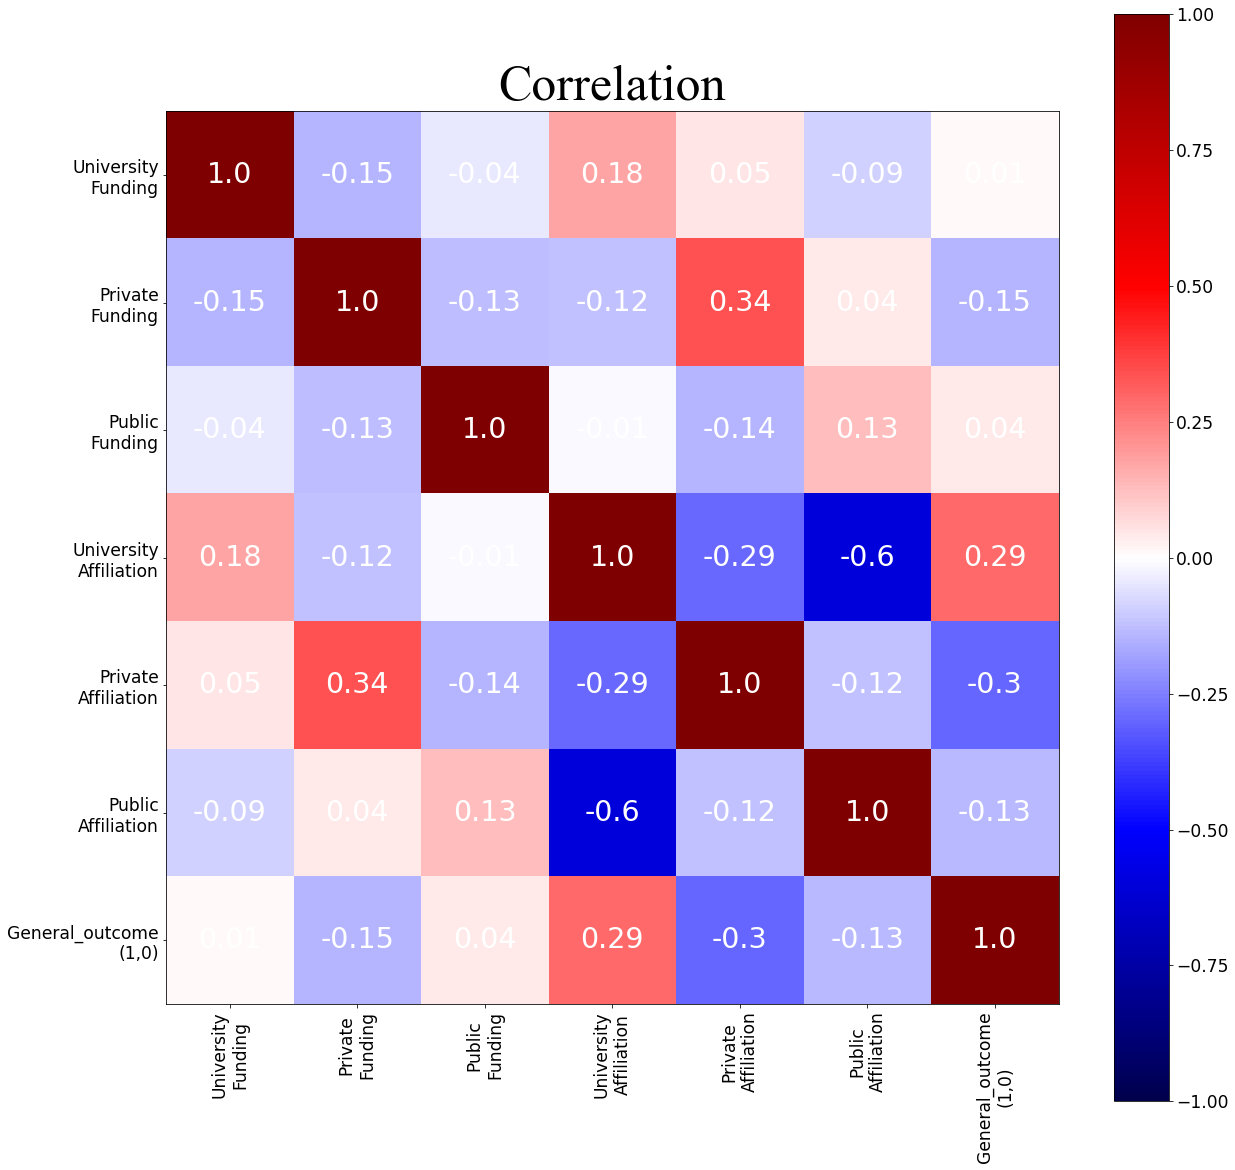

In [22]:
corr_data = data_for_stats.corr()
corr_matrix_heatmap(corr_data)

<ipython-input-15-0b664b4e49e2>:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(data_reg,


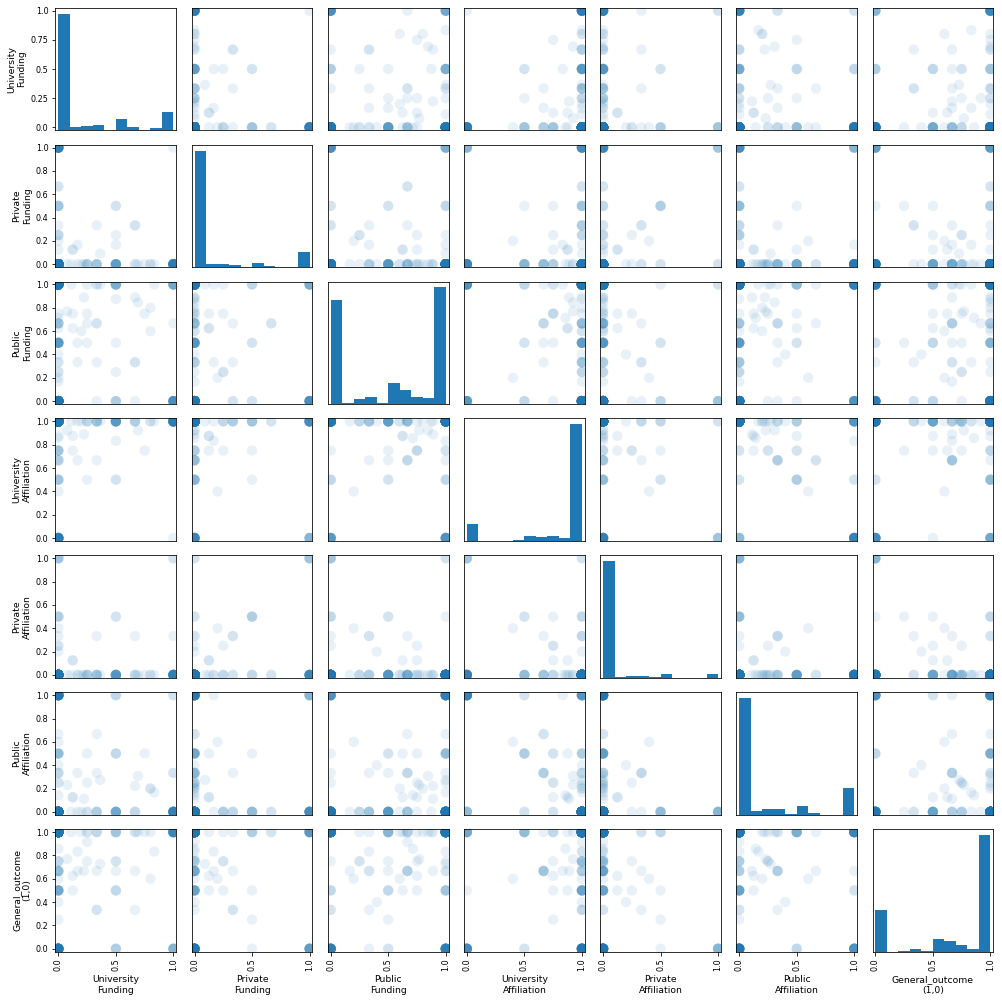

In [29]:
formatted_scatter_matrix(data_for_stats.rename(columns= {key:key.replace(" ","\n") for key in data_for_stats}), 
                         alpha = .1,
                        size = 3000)
#pp.close

In [24]:
X = data_for_stats.iloc[:,1:7]
calc_vif(X)

,variables,VIF
0,Private Funding,1.368601
1,Public Funding,2.402313
2,University Affiliation,4.862164
3,Private Affiliation,1.214997
4,Public Affiliation,1.390236
5,"General_outcome (1,0)",4.302933
